<a href="https://colab.research.google.com/github/JasnaJovanova/DATA-science-laboratory-excercises/blob/master/Laboratory_excercise_4_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/twitter_training.csv')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Pretpostavka: "texts" e listata na tekstualni podatoci, a "labels" e listata na odgovaracite oznaki
texts = ["Borderlands", "Positive", "im getting on borderlands and i will murder you all"]
labels = [0, 1, 0]  # Primer na labels za klasifikacija

# 1. Prvi del na pipeline: Tokenizacija i pretvaranje vo broevi
max_length = 10  # Maksimalna dolzina na sekvencite
max_words = 1000  # Maksimalen broj na unikatni zborovi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Sekvencite da se padnu na maksimalna dolžina
X = pad_sequences(sequences, maxlen=max_length)

# Pretvorba na y_labels vo numpy array
y = np.array(labels)

# 2. Vtor del na pipeline: Definiranje na modelot
model = Sequential()

# 2.1. Prv sloj - Embedding
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_length))

# 2.2. Dodavanje na LSTM sloj za klasifikacija (ako e potrebna)
model.add(LSTM(64, return_sequences=False))

# 2.3. Dodavanje na gust sloj za klasifikacija
model.add(Dense(1, activation='sigmoid'))  # Sigmoid za binarna klasifikacija

# Kompajliranje na modelot
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Podgotovka na podaci za obuka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proveruvanje na oblikot na podatocite
print(f"Oblik na X_train: {X_train.shape}")
print(f"Oblik na y_train: {y_train.shape}")

# Obuka na modelot
model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

Oblik na X_train: (2, 10)
Oblik na y_train: (2,)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6990 - val_accuracy: 0.0000e+00 - val_loss: 0.6955
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 1.0000 - loss: 0.6918 - val_accuracy: 0.0000e+00 - val_loss: 0.7062
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6850 - val_accuracy: 0.0000e+00 - val_loss: 0.7157
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.6782 - val_accuracy: 0.0000e+00 - val_loss: 0.7248
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.6712 - val_accuracy: 0.0000e+00 - val_loss: 0.7341
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.7442
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.6554 - val_accuracy: 0.0000e+00 - val_loss: 0.7556
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6463 - val_accuracy: 0.0000e+

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Pretpostavka: "texts" e listata na tekstualni podatoci, a "labels" e listata na odgovaracite oznaki
texts = ["Borderlands", "Positive", "im getting on borderlands and i will murder you all"]
labels = [0, 1, 0]  # Primer na labels za klasifikacija

# 1. Prvi del na pipeline: Tokenizacija i pretvaranje vo broevi
max_length = 10  # Maksimalna dolzina na sekvencite
max_words = 1000  # Maksimalen broj na unikatni zborovi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

X = pad_sequences(sequences, maxlen=max_length)

y = np.array(labels)

# 2. Vtor del na pipeline: Definiranje na modelot
model = Sequential()

# 2.1. Prv sloj - Embedding
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_length))

# 2.2. Dodavanje na Bidirectional LSTM sloj za boljije ucenje na kontekst
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# 2.3. Dodavanje na Dropout sloj za prevencija od pretreniranost
model.add(Dropout(0.5))

# 2.4. Dodavanje na LSTM sloj
model.add(LSTM(64, return_sequences=False))

# 2.5. Dodavanje na gust sloj za klasifikacija
model.add(Dense(1, activation='sigmoid'))  # Sigmoid za binarna klasifikacija

# Kompajliranje na modelot
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Podgotovka na podaci za obuka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proveruvanje na oblikot na podatocite
print(f"Oblik na X_train: {X_train.shape}")
print(f"Oblik na y_train: {y_train.shape}")

# Obuka na modelot
model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

Oblik na X_train: (2, 10)
Oblik na y_train: (2,)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.0000e+00 - val_loss: 0.7117
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 1.0000 - loss: 0.6822 - val_accuracy: 0.0000e+00 - val_loss: 0.7246
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.6744 - val_accuracy: 0.0000e+00 - val_loss: 0.7399
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.6588 - val_accuracy: 0.0000e+00 - val_loss: 0.7593
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.6468 - val_accuracy: 0.0000e+00 - val_loss: 0.7838
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.6297 - val_accuracy: 0.0000e+00 - val_loss: 0.8161
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.6115 - val_accuracy: 0.0000e+00 - val_loss: 0.8592
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step 

Oblik na X_train: (2, 10)
Oblik na y_train: (2,)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6936 - val_accuracy: 0.0000e+00 - val_loss: 0.7014
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 1.0000 - loss: 0.6873 - val_accuracy: 0.0000e+00 - val_loss: 0.7108
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.6813 - val_accuracy: 0.0000e+00 - val_loss: 0.7202
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.6712 - val_accuracy: 0.0000e+00 - val_loss: 0.7305
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.6632 - val_accuracy: 0.0000e+00 - val_loss: 0.7437
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.6538 - val_accuracy: 0.0000e+00 - val_loss: 0.7607
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.6409 - val_accuracy: 0.0000e+00 - val_loss: 0.7834
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

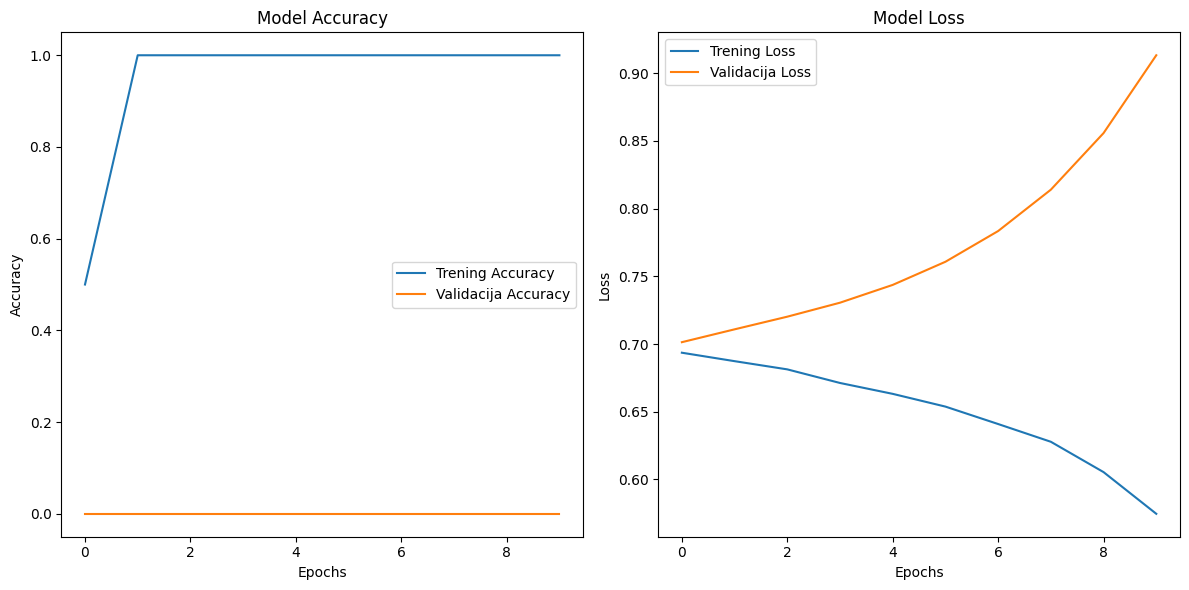

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Dodavanje za crtanje grafikona

# Pretpostavka: "texts" e listata na tekstualni podatoci, a "labels" e listata na odgovaracite oznaki
texts = ["Borderlands", "Positive", "im getting on borderlands and i will murder you all"]
labels = [0, 1, 0]  # Primer na labels za klasifikacija

# 1. Prv del na pipeline: Tokenizacija i pretvaranje vo broevi
max_length = 10  # Maksimalna dolzina na sekvencite
max_words = 1000  # Maksimalen broj na unikatni zborovi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

X = pad_sequences(sequences, maxlen=max_length)

# Pretvorba na y_labels vo numpy array
y = np.array(labels)

# 2. Vtor del na pipeline: Definiranje na modelot
model = Sequential()

# 2.1. Prv sloj - Embedding
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_length))

# 2.2. Dodavanje na Bidirectional LSTM sloj za boljije ucenje na kontekst
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# 2.3. Dodavanje na Dropout sloj za prevencija od pretreniranost
model.add(Dropout(0.5))

# 2.4. Dodavanje na LSTM sloj
model.add(LSTM(64, return_sequences=False))

# 2.5. Dodavanje na gust sloj za klasifikacija
model.add(Dense(1, activation='sigmoid'))  # Sigmoid za binarna klasifikacija

# Kompajliranje na modelot
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Podgotovka na podaci za obuka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proveruvanje na oblikot na podatocite
print(f"Oblik na X_train: {X_train.shape}")
print(f"Oblik na y_train: {y_train.shape}")

# Obuka na modelot i cuvanje na istorijata
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

# 3. Crtanje na grafikon za Accuracy i Loss
# Grafik za Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trening Accuracy')
plt.plot(history.history['val_accuracy'], label='Validacija Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik za Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trening Loss')
plt.plot(history.history['val_loss'], label='Validacija Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Oblik na X_train: (2, 10)
Oblik na y_train: (2,)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 0.7094
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.6838 - val_accuracy: 0.0000e+00 - val_loss: 0.7190
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.6775 - val_accuracy: 0.0000e+00 - val_loss: 0.7292
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.6657 - val_accuracy: 0.0000e+00 - val_loss: 0.7416
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6557 - val_accuracy: 0.0000e+00 - val_loss: 0.7576
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.6408 - val_accuracy: 0.0000e+00 - val_loss: 0.7790
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.6260 - val_accuracy: 0.0000e+00 - val_loss: 0.8080
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms

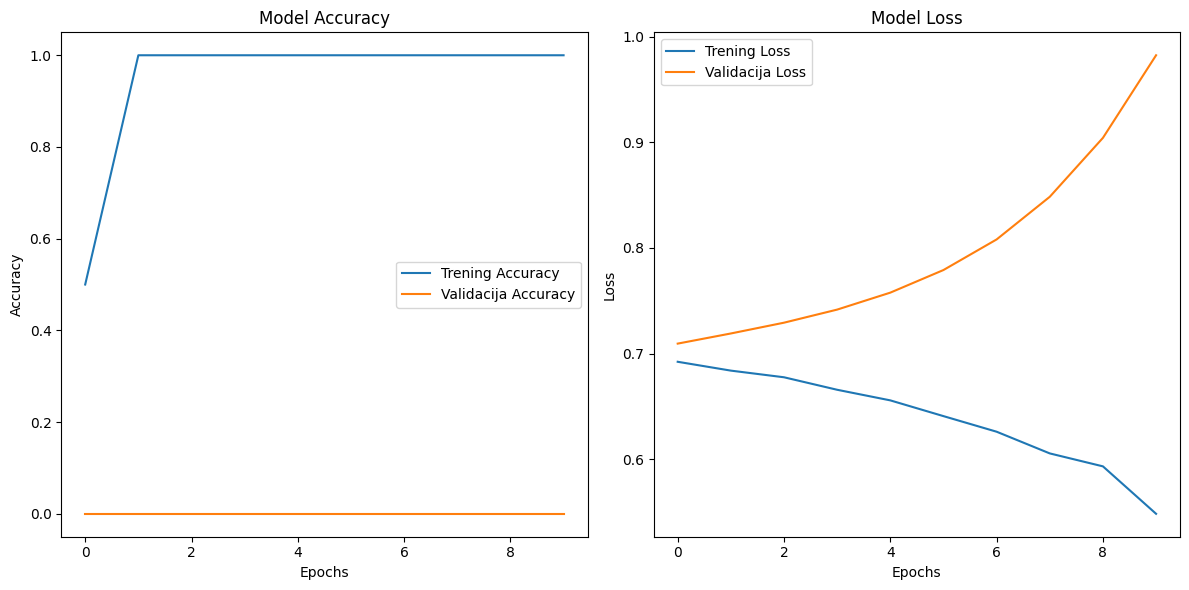

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Dodavanje za crtanje grafikona

# Pretpostavka: "texts" e listata na tekstualni podatoci, a "labels" e listata na odgovaracite oznaki
texts = ["Borderlands", "Positive", "im getting on borderlands and i will murder you all"]
labels = [0, 1, 0]  # Primer na labels za klasifikacija

# 1. Prvi del na pipeline: Tokenizacija i pretvaranje vo broevi
max_length = 10  # Maksimalna dolzina na sekvencite
max_words = 1000  # Maksimalen broj na unikatni zborovi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Sekvencite da se padnu na maksimalna dolžina
X = pad_sequences(sequences, maxlen=max_length)

# Pretvorba na y_labels vo numpy array
y = np.array(labels)

# 2. Vtor del na pipeline: Definiranje na modelot
model = Sequential()

# 2.1. Prv sloj - Embedding
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_length))

# 2.2. Dodavanje na Bidirectional LSTM sloj za boljije ucenje na kontekst
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# 2.3. Dodavanje na Dropout sloj za prevencija od pretreniranost
model.add(Dropout(0.5))

# 2.4. Dodavanje na LSTM sloj
model.add(LSTM(64, return_sequences=False))

# 2.5. Dodavanje na gust sloj za klasifikacija
model.add(Dense(1, activation='sigmoid'))  # Sigmoid za binarna klasifikacija

# Kompajliranje na modelot
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Podgotovka na podaci za obuka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proveruvanje na oblikot na podatocite
print(f"Oblik na X_train: {X_train.shape}")
print(f"Oblik na y_train: {y_train.shape}")

# Obuka na modelot i cuvanje na istorijata
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

# 3. Crtanje na grafikon za Accuracy i Loss sa trening i validacija
# Grafik za Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trening Accuracy')
plt.plot(history.history['val_accuracy'], label='Validacija Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik za Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trening Loss')
plt.plot(history.history['val_loss'], label='Validacija Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.7139
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5000 - loss: 0.6962 - val_accuracy: 0.0000e+00 - val_loss: 0.7239
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6892 - val_accuracy: 0.0000e+00 - val_loss: 0.7317
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6785 - val_accuracy: 0.0000e+00 - val_loss: 0.7400
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.6713 - val_accuracy: 0.0000e+00 - val_loss: 0.7492
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6553 - val_accuracy: 0.0000e+00 - val_loss: 0.7597
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.6652 - val_accuracy: 0.0000e+00 - val_loss: 0.7711
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.6549 - val_accurac

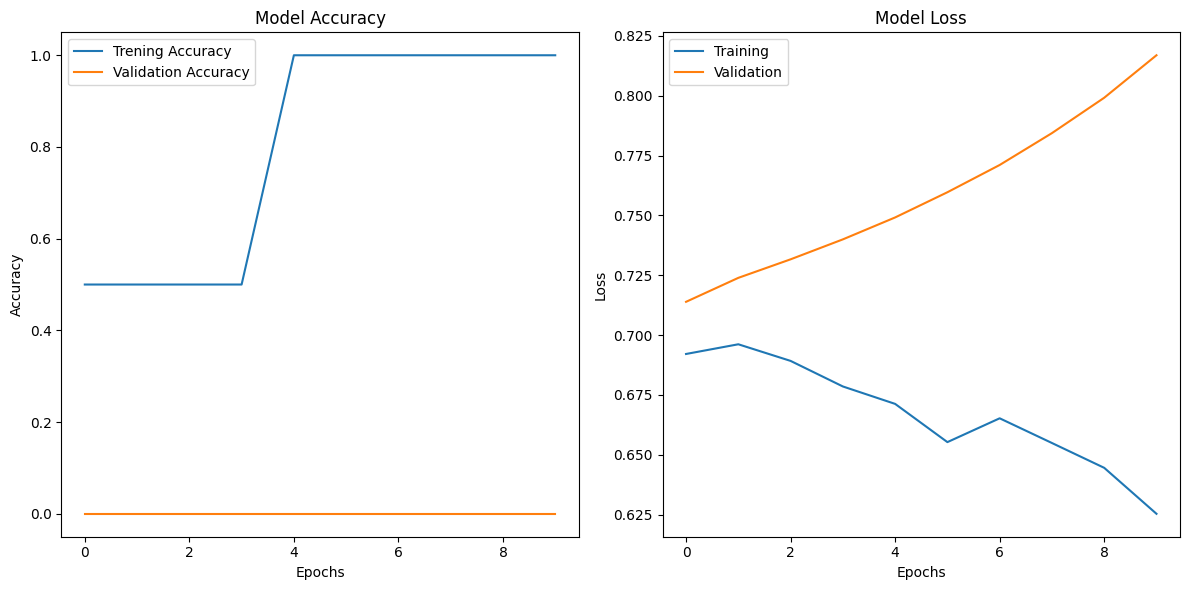

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

texts = ["Borderlands", "Positive", "im getting on borderlands and i will murder you all"]
labels = [0, 1, 0]

max_length = 10
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

X = pad_sequences(sequences, maxlen=max_length)

y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_length))

model.add(LSTM(64, return_sequences=False))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trening Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()